# Importando libreri y DF

In [24]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [25]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [26]:
data2=pd.read_excel('pan.xlsx')

In [27]:
#Resoluciones por año
resoaño=data2.groupby(["año"])["Resumen"].count()
data2.groupby(["año"])["Resumen"].count()
resoaño.index


Index([' 201', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', 'AN N'],
      dtype='object', name='año')

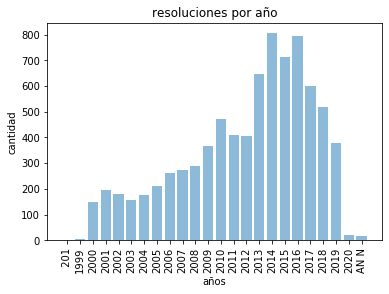

In [28]:
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [29]:
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=8

#año
año=2019

#nombre
nombre="pan.html"

In [30]:
#data2=data2[data2["año"]==año]

In [31]:
data2

,TITULO,FECHA,Resumen,LINK,año
0,AN No.16050-Elec de 2020-03-27,2020-03-27,Por la cual se suspende temporalmente la aplic...,https://www.asep.gob.pa/?p=194949,2020
1,AN No.16052-Elec de 2020-03-30,2020-03-30,Por la cual se establecen medidas transitorias...,https://www.asep.gob.pa/?p=194951,2020
2,AN No.16057-Elec de 2020-03-31,2020-03-31,Por la cual se modifica la ResoluciÃ³n AN No.1...,https://www.asep.gob.pa/?p=194963,2020
3,AN No.16047-Elec de 2020-03-27,2020-03-27,Por la cual se declara la actualizaciÃ³n mensu...,https://www.asep.gob.pa/?p=194940,2020
4,AN No.16048-Elec de 2020-03-27,2020-03-27,Por la cual se declara actualizaciÃ³n mensual ...,https://www.asep.gob.pa/?p=194944,2020
...,...,...,...,...,...
8041,JD-1777 de 1999-12-24,1999-12-24,POR LA CUAL SE ESTABLECE EL INGRESO MÃXIMO PE...,https://www.asep.gob.pa/?p=164952,1999
8042,JD-1795 de 2000-01-18,2000-01-18,POR LA CUAL SE RESUELVE EL RECURSO DE RECONSID...,https://www.asep.gob.pa/?p=164957,2000
8043,JD-1775 de 1999-12-24,1999-12-24,POR LA CUAL SE APRUEBA LOS COSTOS DE LOS ESTUD...,https://www.asep.gob.pa/?p=164950,1999
8044,JD-1793 de 2000-01-18,2000-01-18,POR LA CUAL SE RESUELVE EL RECURSO DE RECONSID...,https://www.asep.gob.pa/?p=164955,2000


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [32]:
data2.Resumen=data2.Resumen.apply(str)
data2.Resumen=data2.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
data2.Resumen=data2.Resumen.str.replace('[0-9]', ' ') 
data2.Resumen=data2.Resumen.str.replace('reuters', '')
data2.Resumen=data2.Resumen.str.replace('regulación', '')
data2.Resumen=data2.Resumen.str.replace('resolución', '')
data2.Resumen=data2.Resumen.str.replace('factores', '')
data2.Resumen=data2.Resumen.str.replace('  +', ' ')
data2.Resumen=data2.Resumen.str.replace('said', '')
data2.Resumen=data2.Resumen.str.replace('dominicana', '') 
data2.Resumen=data2.Resumen.str.replace('republica', '') 
data2.Resumen=data2.Resumen.str.replace("usuarios", "usuario")
data2.Resumen=data2.Resumen.str.replace("ede", "")
data2.Resumen=data2.Resumen.str.replace("creg", "")
data2.Resumen=data2.Resumen.str.replace("resoluciones", "")

In [33]:
data2

,TITULO,FECHA,Resumen,LINK,año
0,AN No.16050-Elec de 2020-03-27,2020-03-27,por la cual se suspende temporalmente la aplic...,https://www.asep.gob.pa/?p=194949,2020
1,AN No.16052-Elec de 2020-03-30,2020-03-30,por la cual se establecen medidas transitorias...,https://www.asep.gob.pa/?p=194951,2020
2,AN No.16057-Elec de 2020-03-31,2020-03-31,por la cual se modifica la resoluciã³n an no. ...,https://www.asep.gob.pa/?p=194963,2020
3,AN No.16047-Elec de 2020-03-27,2020-03-27,por la cual se declara la actualizaciã³n mensu...,https://www.asep.gob.pa/?p=194940,2020
4,AN No.16048-Elec de 2020-03-27,2020-03-27,por la cual se declara actualizaciã³n mensual ...,https://www.asep.gob.pa/?p=194944,2020
...,...,...,...,...,...
8041,JD-1777 de 1999-12-24,1999-12-24,por la cual se establece el ingreso mãximo pe...,https://www.asep.gob.pa/?p=164952,1999
8042,JD-1795 de 2000-01-18,2000-01-18,por la cual se resuelve el recurso de reconsid...,https://www.asep.gob.pa/?p=164957,2000
8043,JD-1775 de 1999-12-24,1999-12-24,por la cual se aprueba los costos de los estud...,https://www.asep.gob.pa/?p=164950,1999
8044,JD-1793 de 2000-01-18,2000-01-18,por la cual se resuelve el recurso de reconsid...,https://www.asep.gob.pa/?p=164955,2000


In [34]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,1), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(data2.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(data2.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [35]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [36]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,_elec,abril,acepta,acto,actualizaciã³n,actuando,acumulados,adenda,adendas,adicional,...,tarifas,termoelã,tramitan,transferir,transmisiã,transmisiã³n,tã,vigentes,ximo,œpor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

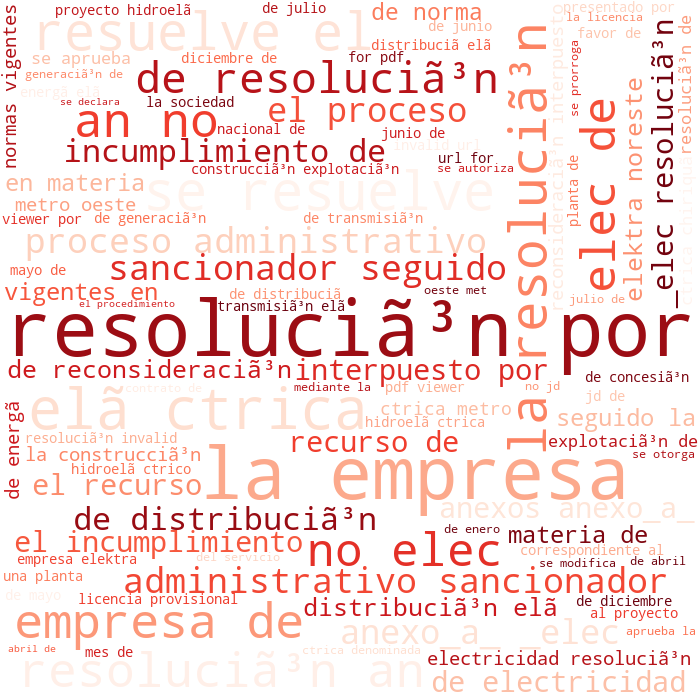

In [38]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(data2.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [39]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [40]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
autoridad, nacional, servicios, pãºblicos, administrativos, tã, marzo, ordena, procesos, tramitan, rminos, suspensiã³n, transmisiã, inc, empresas

Topic #1:
an, elec, generaciã³n, planta, licencia, explotaciã³n, empresa, construcciã³n, solar, denominada, provisional, mediante, prorroga, fotovoltaica, favor

Topic #2:
administrativo, seguido, resuelve, sancionador, incumplimiento, electricidad, normas, materia, proceso, vigentes, empresa, elektra, noreste, aã, anexo

Topic #3:
_elec, elã, ctrica, empresa, anexos, power, eximencias, califican, anexo_a_, denominada, correspondientes, invocadas, servicio, mes, informe

Topic #4:
diferencial, parcial, mensual, costos, corresponde, actualizaciã³n, mes, declara, procedimiento, establece, empresa, distribuciã, elã, ctrica, ejecuciã³n

Topic #5:
empresa, elã, ctrica, etesa, distribuciã³n, correspondiente, metro, oeste, chiriquã, transmisiã³n, distribuciã, noreste, elektra, enero, favor

Topic #6:
anexo, elec, panamã, diciembre, tarif

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [41]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 8.41 s


Text(0, 0.5, 'log-likelihood')

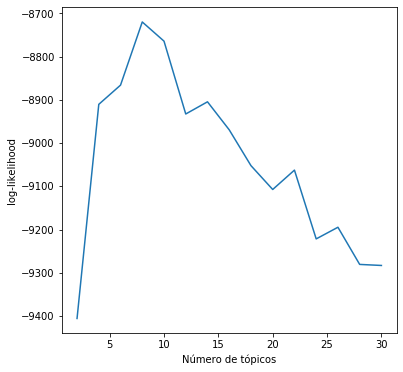

In [42]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [43]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [44]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook